# Processar as redes e extrair informações pelo IGraph

Nesse notebook eu faço todos os preparos para atribuir as features da rede à cada uma das rede, incluindo a rede UNITY 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mygene
import h5py
import networkx as nx
import seaborn as sns
%matplotlib inline

## Rede Parsimonious Composite Network (PCNet)

In [2]:
pcnet_edgelist = pd.read_csv('C:/Users/renan/Desktop/UFRGS/GNN/data/networks/Netwoks_NDEx/pcnet_edgelist.tsv', sep= '\t')

pcnet_network = pcnet_edgelist.drop(columns=['Unnamed: 0', 'Source', 'Target'])

pcnet_network

,Source_Name,Target_Name
0,UBE2Q1,RNF14
1,UBE2Q1,UBE2Q2
2,UBE2Q1,TMCO1
3,UBE2Q1,UBAC1
4,UBE2Q1,WWP1
...,...,...
2724719,SLC7A14,SLC7A10
2724720,SLC7A14,SLC7A11
2724721,SELE,SELP
2724722,SIGLEC1,SELP


In [3]:
# Teste com a rede
# Adicionando novas propriedades com o Igraph

# Método de ler arquivo externo para o Igraph

from igraph import *

g = Graph.DataFrame(pcnet_network, directed=False)

In [4]:
print("Number of vertices:", g.vcount())
print("Number of edges:", g.ecount())
print("Density of the graph:", 2*g.ecount()/(g.vcount()*(g.vcount()-1)))

Number of vertices: 19781
Number of edges: 2724724
Density of the graph: 0.013927654428734787


In [5]:
degrees = []
total = 0
n_vertices = g.vcount()

for n in range(n_vertices):
    neighbours = g.neighbors(n, mode='ALL')
    total += len(neighbours)
    degrees.append(len(neighbours))
    
print("Average degree:", total/n_vertices)
print("Maximum degree:", max(degrees))
print("Vertex ID with the maximum degree:", degrees.index(max(degrees)))

Average degree: 275.4890046003741
Maximum degree: 10042
Vertex ID with the maximum degree: 18218


In [6]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 25})

x = [x for x in range(max(degrees)+1)]
degree_counts = [0 for x in range(10043)]

for i in degrees:
    degree_counts[i] += 1

print("Degree having the maximum number of vertices:", degree_counts.index(max(degree_counts)))
print("Number of vertices having the most abundant degree:", max(degree_counts))

Degree having the maximum number of vertices: 1
Number of vertices having the most abundant degree: 461


In [7]:
print("Diameter of the graph:", g.diameter())

# Source: https://snipplr.com/view/9914

def assortativity(graph, degrees=None):
    if degrees is None: degrees = graph.degree()
    degrees_sq = [deg**2 for deg in degrees]
 
    m = float(graph.ecount())
    num1, num2, den1 = 0, 0, 0
    for source, target in graph.get_edgelist():
        num1 += degrees[source] * degrees[target]
        num2 += degrees[source] + degrees[target]
        den1 += degrees_sq[source] + degrees_sq[target]
 
    num1 /= m
    den1 /= 2*m
    num2 = (num2 / (2*m)) ** 2
 
    return (num1 - num2) / (den1 - num2)

print("Assortativity of the graph:", assortativity(g))

Diameter of the graph: 7
Assortativity of the graph: 0.07988847726818879


In [5]:
betweenness = g.betweenness()

In [9]:
closeness = g.closeness(normalized=False)

# Dá pra normalizar direto (normalized=True)

In [10]:
degree = g.degree()

In [11]:
clustering_coefficient = g.transitivity_local_undirected()

In [6]:
named_vertex_list = g.vs()["name"]

In [7]:
nos_PCNET = {'Gene': named_vertex_list}

lista_PCNET = pd.DataFrame(data = nos_PCNET)

lista_PCNET.to_csv('C:/Users/renan/Desktop/UFRGS/GNN/data/traducao_redes/PCNET_lista.tsv', sep='\t', header=False, index=False)

lista_PCNET

,Gene
0,A1BG
1,A1CF
2,A2M
3,A2ML1
4,A3GALT2
...,...
19776,ZYG11A
19777,ZYG11B
19778,ZYX
19779,ZZEF1


In [13]:
features = {'gene': named_vertex_list, 'betweenness': betweenness, 'closeness': closeness, 'degree': degree, 'clustering_coefficient': clustering_coefficient}

features_pcnet = pd.DataFrame(data = features)

features_pcnet

,gene,betweenness,closeness,degree,clustering_coefficient
0,A1BG,2272.168054,0.424791,147,0.390830
1,A1CF,25805.631503,0.450009,380,0.145244
2,A2M,26929.578374,0.462739,529,0.161261
3,A2ML1,1384.848215,0.388134,70,0.265839
4,A3GALT2,0.000000,0.257125,2,1.000000
...,...,...,...,...,...
19776,ZYG11A,586.631189,0.409538,16,0.241667
19777,ZYG11B,5140.186993,0.430712,85,0.142577
19778,ZYX,61870.972480,0.484102,889,0.154825
19779,ZZEF1,9485.683123,0.443490,160,0.133569


In [16]:
features_pcnet_num = features_pcnet.select_dtypes(include='number')

In [17]:
normalized_pcnet = (features_pcnet_num-features_pcnet_num.min())/(features_pcnet_num.max()-features_pcnet_num.min())

features_pcnet[normalized_pcnet.columns] = normalized_pcnet

features_pcnet

,gene,betweenness,closeness,degree,clustering_coefficient
0,A1BG,0.000096,0.271918,0.014540,0.390830
1,A1CF,0.001090,0.303838,0.037745,0.145244
2,A2M,0.001138,0.319951,0.052584,0.161261
3,A2ML1,0.000059,0.225519,0.006872,0.265839
4,A3GALT2,0.000000,0.059691,0.000100,1.000000
...,...,...,...,...,...
19776,ZYG11A,0.000025,0.252611,0.001494,0.241667
19777,ZYG11B,0.000217,0.279412,0.008366,0.142577
19778,ZYX,0.002614,0.346991,0.088437,0.154825
19779,ZZEF1,0.000401,0.295587,0.015835,0.133569


In [18]:
features_pcnet.to_csv('C:/Users/renan/Desktop/UFRGS/GNN/data/features/features_pcnet.tsv', sep='\t')

## Rede ConsensusPathDB

In [8]:
cpdb_edgelist = pd.read_csv('C:/Users/renan/Desktop/UFRGS/GNN/data/networks/Netwoks_NDEx/cpdb_edgelist.tsv', sep= '\t')

cpdb_network = cpdb_edgelist.drop(columns=['Unnamed: 0', 'Source', 'Target'])

cpdb_network

,Source_Name,Target_Name
0,RNF14,VDR
1,RNF14,SMAD4
2,RNF14,UBE2D4
3,RNF14,UBE2D2
4,RNF14,UBE2D3
...,...,...
1648421,CFL1,SERPINH1
1648422,DNM1L,PLEKHG1
1648423,SERPINH1,MRPL23
1648424,NFIA,NFIX


In [9]:
# Teste com a rede
# Adicionando novas propriedades com o Igraph

# Método de ler arquivo externo para o Igraph

from igraph import *

g = Graph.DataFrame(cpdb_network, directed=False)

In [12]:
print("Number of vertices:", g.vcount())
print("Number of edges:", g.ecount())
print("Density of the graph:", 2*g.ecount()/(g.vcount()*(g.vcount()-1)))

Number of vertices: 16301
Number of edges: 1648426
Density of the graph: 0.012407880430384977


In [209]:
degrees = []
total = 0
n_vertices = g.vcount()

for n in range(n_vertices):
    neighbours = g.neighbors(n, mode='ALL')
    total += len(neighbours)
    degrees.append(len(neighbours))
    
print("Average degree:", total/n_vertices)
print("Maximum degree:", max(degrees))
print("Vertex ID with the maximum degree:", degrees.index(max(degrees)))

Average degree: 202.24845101527512
Maximum degree: 2691
Vertex ID with the maximum degree: 14556


In [210]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 25})

x = [x for x in range(max(degrees)+1)]
degree_counts = [0 for x in range(2692)]

for i in degrees:
    degree_counts[i] += 1

print("Degree having the maximum number of vertices:", degree_counts.index(max(degree_counts)))
print("Number of vertices having the most abundant degree:", max(degree_counts))

Degree having the maximum number of vertices: 1
Number of vertices having the most abundant degree: 1225


In [211]:
print("Diameter of the graph:", g.diameter())

# Source: https://snipplr.com/view/9914

def assortativity(graph, degrees=None):
    if degrees is None: degrees = graph.degree()
    degrees_sq = [deg**2 for deg in degrees]
 
    m = float(graph.ecount())
    num1, num2, den1 = 0, 0, 0
    for source, target in graph.get_edgelist():
        num1 += degrees[source] * degrees[target]
        num2 += degrees[source] + degrees[target]
        den1 += degrees_sq[source] + degrees_sq[target]
 
    num1 /= m
    den1 /= 2*m
    num2 = (num2 / (2*m)) ** 2
 
    return (num1 - num2) / (den1 - num2)

print("Assortativity of the graph:", assortativity(g))

Diameter of the graph: 8
Assortativity of the graph: 0.32240021140273994


In [212]:
betweenness = g.betweenness()

In [213]:
closeness = g.closeness()

In [214]:
degree = g.degree()

In [215]:
clustering_coefficient = g.transitivity_local_undirected()

In [10]:
named_vertex_list = g.vs()["name"]

In [11]:
nos_CPDB = {'Gene': named_vertex_list}

lista_CPDB = pd.DataFrame(data = nos_CPDB)

lista_CPDB.to_csv('C:/Users/renan/Desktop/UFRGS/GNN/data/traducao_redes/CPDB_lista.tsv', sep='\t', header=False, index=False)

lista_CPDB

,Gene
0,A1BG
1,A1CF
2,A2M
3,A2ML1
4,A4GALT
...,...
16296,ZXDC
16297,ZYG11B
16298,ZYX
16299,ZZEF1


In [216]:
features = {'betweenness': betweenness, 'closeness': closeness, 'degree': degree, 'clustering_coefficient': clustering_coefficient}

features_cpdb = pd.DataFrame(data = features)

features_cpdb

,betweenness,closeness,degree,clustering_coefficient
0,16473.797418,0.330793,12,0.045455
1,492.707652,0.347421,14,0.098901
2,111972.986924,0.422395,231,0.159081
3,5628.817279,0.411951,206,0.711295
4,38.990407,0.294991,5,0.000000
...,...,...,...,...
16296,11657.665243,0.391302,87,0.739642
16297,2752.661099,0.377516,73,0.554033
16298,60174.746313,0.464394,1282,0.720528
16299,7255.651393,0.389495,132,0.269720


In [217]:
normalized_cpdb = (features_cpdb-features_cpdb.min())/(features_cpdb.max()-features_cpdb.min())

normalized_cpdb.to_csv('C:/Users/renan/Desktop/UFRGS/GNN/data/networks/Netwoks_NDEx/normalized_cpdb_features.tsv', sep='\t')

normalized_cpdb

,betweenness,closeness,degree,clustering_coefficient
0,0.002206,0.173727,0.004089,0.045455
1,0.000066,0.194257,0.004833,0.098901
2,0.014995,0.286829,0.085502,0.159081
3,0.000754,0.273933,0.076208,0.711295
4,0.000005,0.129522,0.001487,0.000000
...,...,...,...,...
16296,0.001561,0.248438,0.031970,0.739642
16297,0.000369,0.231417,0.026766,0.554033
16298,0.008058,0.338684,0.476208,0.720528
16299,0.000972,0.246207,0.048699,0.269720


## Rede HPRD

In [13]:
HPRD_edgelist = pd.read_csv('C:/Users/renan/Desktop/UFRGS/GNN/data/networks/Netwoks_NDEx/HPRD_network_final.tsv', sep= '\t')

# HPRD_network = HPRD_edgelist.drop(columns=['Unnamed: 0', 'Source', 'Target'])
HPRD_network = HPRD_edgelist.drop(columns=['Unnamed: 0']) # Já recebendo o banco pré-processado para remover caracteres inválidos

HPRD_network

,Source_Name,Target_Name
0,NR3C1,RNF14
1,NCOA4,RNF14
2,ESR1,RNF14
3,RNF14,UBE2E1
4,FAM46A,RNF14
...,...,...
36862,SELE,SELL
36863,CRYAA,CRYAB
36864,PLAT,PLAU
36865,NFIB,NFIC


In [17]:
# Como fazer o mesmo processo de tradução nas redes? a lista aqui possui muitos genes repetidos mesmo antes de entrar para o site, não posso remover as duplicadas aqui 
# Ideia: usar a lista de nós para fazer um dicionário e traduzir a partir de uma lista que sei que tem todos os genes 

# Solução1: Usar a lista de nós sem duplicadas tratada da mesma forma que as features para traduzir as colunas da rede



nos_HPRD = {'Gene': named_vertex_list}

lista_HPRD = pd.DataFrame(data = nos_HPRD)

lista_HPRD.to_csv('C:/Users/renan/Desktop/UFRGS/GNN/data/traducao_redes/HPRD_lista.tsv', sep='\t', header=False, index=False)

lista_HPRD

,Gene
0,A1BG
1,A1CF
2,A2M
3,AAGAB
4,AAMP
...,...
9448,ZWINT
9449,ZXDC
9450,ZYG11B
9451,ZYX


In [15]:
HPRD_trad = pd.read_csv('C:/Users/renan/Desktop/UFRGS/GNN/data/traducao_redes/HPRD_lista_trad.csv', header=1)

HPRD_trad2 = HPRD_trad.drop(columns=['Approved name', 'Location'])

HPRD_trad2

,Input,Match type,Approved symbol,HGNC ID
0,A1BG,Approved symbol,A1BG,HGNC:5
1,A1CF,Approved symbol,A1CF,HGNC:24086
2,A2M,Approved symbol,A2M,HGNC:7
3,AAGAB,Approved symbol,AAGAB,HGNC:25662
4,AAMP,Approved symbol,AAMP,HGNC:18
...,...,...,...,...
9907,ZWINT,Approved symbol,ZWINT,HGNC:13195
9908,ZXDC,Approved symbol,ZXDC,HGNC:28160
9909,ZYG11B,Approved symbol,ZYG11B,HGNC:25820
9910,ZYX,Approved symbol,ZYX,HGNC:13200


In [16]:
HPRD_trad2['Match type'].value_counts()

Approved symbol    8819
Previous symbol     689
Alias symbol        401
Entry withdrawn       2
Unmatched             1
Name: Match type, dtype: int64

In [17]:
HPRD_trad2_solucao1 = HPRD_trad2.drop_duplicates(subset = ['Input'], keep = 'first')

HPRD_trad2_solucao1

,Input,Match type,Approved symbol,HGNC ID
0,A1BG,Approved symbol,A1BG,HGNC:5
1,A1CF,Approved symbol,A1CF,HGNC:24086
2,A2M,Approved symbol,A2M,HGNC:7
3,AAGAB,Approved symbol,AAGAB,HGNC:25662
4,AAMP,Approved symbol,AAMP,HGNC:18
...,...,...,...,...
9907,ZWINT,Approved symbol,ZWINT,HGNC:13195
9908,ZXDC,Approved symbol,ZXDC,HGNC:28160
9909,ZYG11B,Approved symbol,ZYG11B,HGNC:25820
9910,ZYX,Approved symbol,ZYX,HGNC:13200


In [18]:
HPRD_trad2_solucao1['Match type'].value_counts()

Approved symbol    8819
Previous symbol     627
Alias symbol          4
Entry withdrawn       2
Unmatched             1
Name: Match type, dtype: int64

In [19]:
HPRD_trad2_solucao1.to_csv('C:/Users/renan/Desktop/UFRGS/GNN/data/traducao_redes/HPRD_lista_final.tsv', sep='\t')

In [20]:
# Tentativa de traduzir

HPRD_network.replace(HPRD_trad2_solucao1.set_index('Input').to_dict()['Approved symbol'], inplace = True)

HPRD_network

,Source_Name,Target_Name
0,NR3C1,RNF14
1,NCOA4,RNF14
2,ESR1,RNF14
3,RNF14,UBE2E1
4,TENT5A,RNF14
...,...,...
36862,SELE,SELL
36863,CRYAA,CRYAB
36864,PLAT,PLAU
36865,NFIB,NFIC


In [22]:
# como verificar se realizou a tradução no target também? 

HPRD_features_trad3 = HPRD_trad2_solucao1.rename(columns={"Match type": "match_type"})

HPRD_features_trad4 = HPRD_features_trad3[HPRD_features_trad3.match_type == 'Previous symbol']

HPRD_features_trad4

,Input,match_type,Approved symbol,HGNC ID
6,AARS,Previous symbol,AARS1,HGNC:20
43,ABP1,Previous symbol,AOC1,HGNC:80
60,ACCN1,Previous symbol,ASIC2,HGNC:99
61,ACCN2,Previous symbol,ASIC1,HGNC:100
62,ACCN3,Previous symbol,ASIC3,HGNC:101
...,...,...,...,...
9805,ZNF259,Previous symbol,ZPR1,HGNC:13051
9811,ZNF295,Previous symbol,ZBTB21,HGNC:13083
9834,ZNF434,Previous symbol,ZSCAN32,HGNC:20812
9889,ZNRD1,Previous symbol,POLR1H,HGNC:13182


In [29]:
print(HPRD_network.loc[HPRD_network['Target_Name'] == 'ASIC1'])

     Source_Name Target_Name
9950       ASIC2       ASIC1


In [14]:
# Teste com a rede
# Adicionando novas propriedades com o Igraph

# Método de ler arquivo externo para o Igraph

from igraph import *

g = Graph.DataFrame(HPRD_network, directed=False)

In [15]:
print("Number of vertices:", g.vcount())
print("Number of edges:", g.ecount())
print("Density of the graph:", 2*g.ecount()/(g.vcount()*(g.vcount()-1)))

Number of vertices: 9453
Number of edges: 36867
Density of the graph: 0.0008252288903844348


In [16]:
named_vertex_list = g.vs()["name"]

In [10]:
named_vertex_list

['A1BG',
 'A1CF',
 'A2M',
 'AAGAB',
 'AAMP',
 'AANAT',
 'AARS',
 'AARS2',
 'AASDHPPT',
 'AATF',
 'ABAT',
 'ABCA1',
 'ABCA2',
 'ABCA4',
 'ABCB1',
 'ABCB11',
 'ABCB4',
 'ABCB5',
 'ABCB7',
 'ABCB8',
 'ABCC2',
 'ABCC8',
 'ABCC9',
 'ABCD1',
 'ABCD2',
 'ABCD3',
 'ABCD4',
 'ABCE1',
 'ABCF1',
 'ABCF3',
 'ABCG1',
 'ABCG4',
 'ABCG5',
 'ABCG8',
 'ABHD5',
 'ABI1',
 'ABI2',
 'ABI3',
 'ABI3BP',
 'ABL1',
 'ABL2',
 'ABLIM1',
 'ABLIM3',
 'ABP1',
 'ABR',
 'ABRA',
 'ABT1',
 'ABTB1',
 'ABTB2',
 'ACAA2',
 'ACACA',
 'ACACB',
 'ACADM',
 'ACAN',
 'ACAP1',
 'ACAP3',
 'ACAT2',
 'ACBD3',
 'ACCN1',
 'ACCN2',
 'ACCN3',
 'ACCS',
 'ACD',
 'ACE',
 'ACE2',
 'ACHE',
 'ACIN1',
 'ACLY',
 'ACMSD',
 'ACO2',
 'ACOT7',
 'ACOX1',
 'ACOX3',
 'ACP1',
 'ACP5',
 'ACP6',
 'ACPP',
 'ACR',
 'ACSL3',
 'ACSL6',
 'ACSS2',
 'ACTA1',
 'ACTA2',
 'ACTB',
 'ACTC1',
 'ACTG1',
 'ACTG2',
 'ACTL6A',
 'ACTL6B',
 'ACTL7A',
 'ACTN1',
 'ACTN2',
 'ACTN3',
 'ACTN4',
 'ACTR10',
 'ACTR1A',
 'ACTR1B',
 'ACTR2',
 'ACTR3',
 'ACTR3B',
 'ACTR8',
 'ACVR1',
 

In [8]:
degrees = []
total = 0
n_vertices = g.vcount()

for n in range(n_vertices):
    neighbours = g.neighbors(n, mode='ALL')
    total += len(neighbours)
    degrees.append(len(neighbours))
    
print("Average degree:", total/n_vertices)
print("Maximum degree:", max(degrees))
print("Vertex ID with the maximum degree:", degrees.index(max(degrees)))

Average degree: 7.784934844792881
Maximum degree: 269
Vertex ID with the maximum degree: 8591


Degree having the maximum number of vertices: 1
Number of vertices having the most abundant degree: 2405


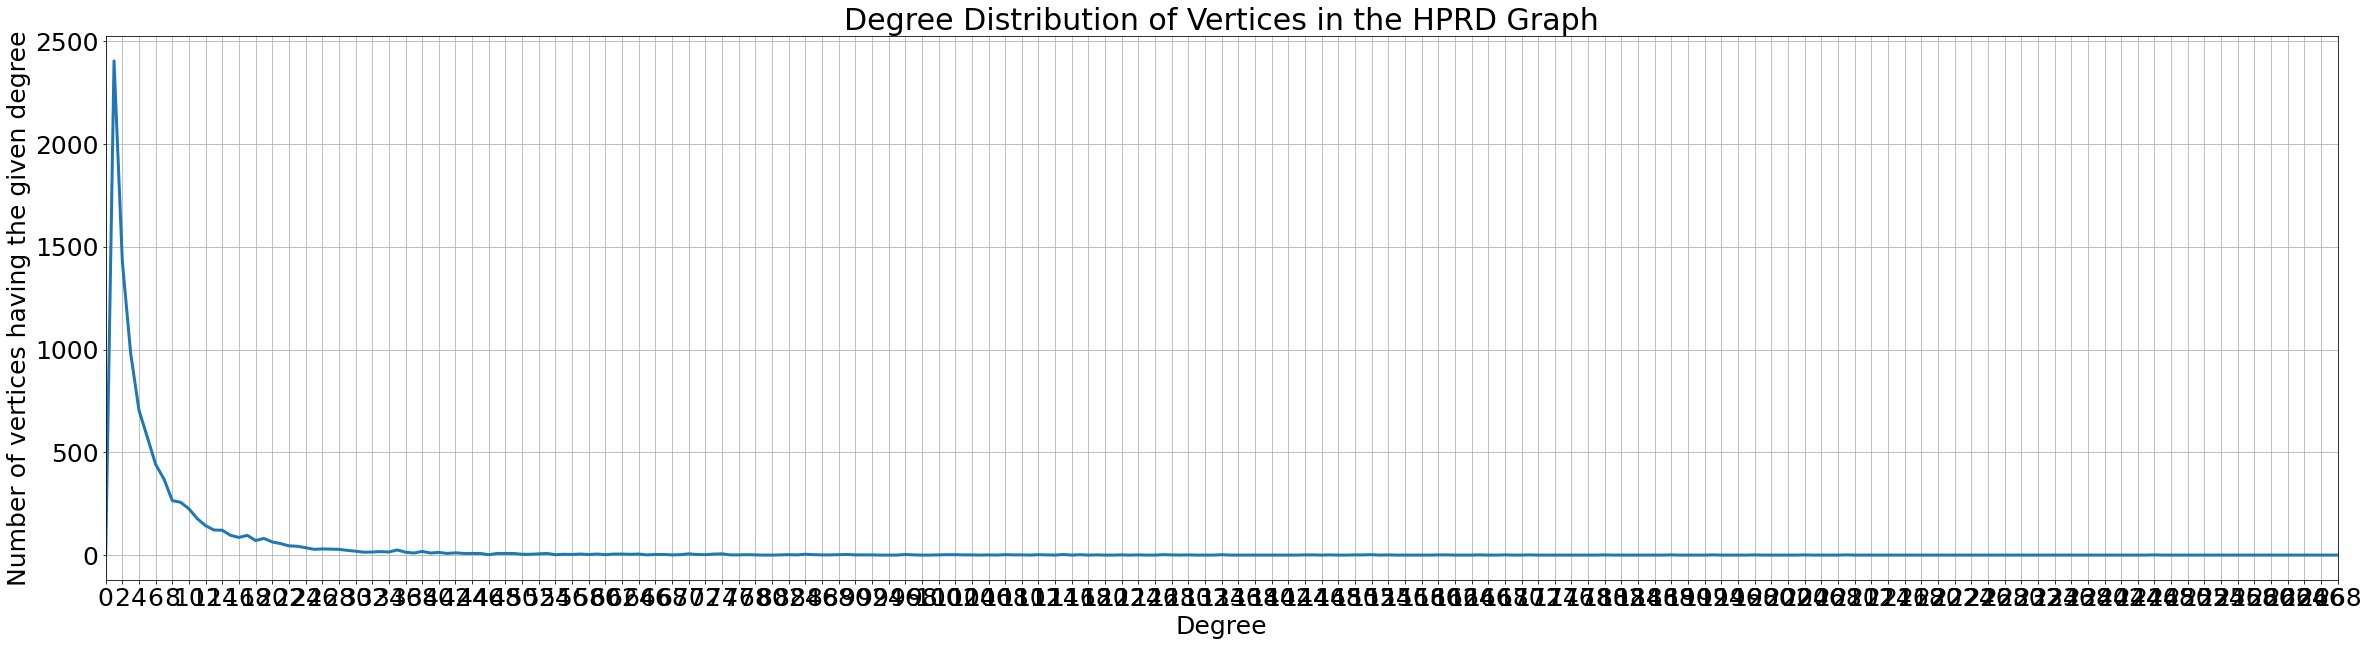

<Figure size 432x288 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 25})

x = [x for x in range(max(degrees)+1)]
degree_counts = [0 for x in range(270)]

for i in degrees:
    degree_counts[i] += 1

print("Degree having the maximum number of vertices:", degree_counts.index(max(degree_counts)))
print("Number of vertices having the most abundant degree:", max(degree_counts))

plt.figure(figsize=(40,10))
plt.plot(x, degree_counts, linewidth=3.0)
plt.ylabel('Number of vertices having the given degree')
plt.xlabel('Degree')
plt.title('Degree Distribution of Vertices in the HPRD Graph')

plt.xlim(0,100)
plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.grid(True)
plt.savefig('degree_distribution.png', bbox_inches='tight')
plt.show()
plt.draw()

In [11]:
print("Diameter of the graph:", g.diameter())

# Source: https://snipplr.com/view/9914

def assortativity(graph, degrees=None):
    if degrees is None: degrees = graph.degree()
    degrees_sq = [deg**2 for deg in degrees]
 
    m = float(graph.ecount())
    num1, num2, den1 = 0, 0, 0
    for source, target in graph.get_edgelist():
        num1 += degrees[source] * degrees[target]
        num2 += degrees[source] + degrees[target]
        den1 += degrees_sq[source] + degrees_sq[target]
 
    num1 /= m
    den1 /= 2*m
    num2 = (num2 / (2*m)) ** 2
 
    return (num1 - num2) / (den1 - num2)

print("Assortativity of the graph:", assortativity(g))

Diameter of the graph: 14
Assortativity of the graph: -0.03547869229603653


In [12]:
betweenness = g.betweenness()

In [13]:
closeness = g.closeness()

In [14]:
degree = g.degree()

In [15]:
clustering_coefficient = g.transitivity_local_undirected()

In [25]:
features = {'Gene': named_vertex_list, 'betweenness': betweenness, 'closeness': closeness, 'degree': degree, 'clustering_coefficient': clustering_coefficient}

features_HPRD = pd.DataFrame(data = features)

features_HPRD

,Gene,betweenness,closeness,degree,clustering_coefficient
0,A1BG,0.000000,1.000000,1,NaN
1,A1CF,1048.168983,0.215117,5,0.100000
2,A2M,94104.312121,0.267844,28,0.010582
3,AAGAB,192.421166,0.235641,2,0.000000
4,AAMP,0.000000,0.210669,1,NaN
...,...,...,...,...,...
9434,ZWINT,1609.204733,0.213493,4,0.333333
9435,ZXDC,48.330815,0.227577,3,0.000000
9436,ZYG11B,0.000000,0.202552,2,1.000000
9437,ZYX,14062.340101,0.271516,15,0.038095


In [17]:
normalized_HPRD = (features_HPRD-features_HPRD.min())/(features_HPRD.max()-features_HPRD.min())

normalized_HPRD.to_csv('C:/Users/renan/Desktop/UFRGS/GNN/data/networks/Netwoks_NDEx/normalized_HPRD_features.tsv', sep='\t')

normalized_HPRD

,betweenness,closeness,degree,clustering_coefficient
0,0.000000,1.000000,0.000000,NaN
1,0.000509,0.125318,0.014925,0.100000
2,0.045698,0.184078,0.100746,0.010582
3,0.000093,0.148191,0.003731,0.000000
4,0.000000,0.120361,0.000000,NaN
...,...,...,...,...
9434,0.000781,0.123508,0.011194,0.333333
9435,0.000023,0.139204,0.007463,0.000000
9436,0.000000,0.111316,0.003731,1.000000
9437,0.006829,0.188170,0.052239,0.038095


## Rede IRefIndex

In [18]:
IRefIndex_edgelist = pd.read_csv('C:/Users/renan/Desktop/UFRGS/GNN/data/networks/Netwoks_NDEx/IRefIndex_edgelist.tsv', sep= '\t')

IRefIndex_network = IRefIndex_edgelist.drop(columns=['Unnamed: 0', 'Source', 'Target'])

IRefIndex_network

,Source_Name,Target_Name
0,RNF14,AR
1,RNF14,TCF3
2,RNF14,UBE2E1
3,RNF14,UBE2D4
4,RNF14,UBE2D3
...,...,...
133543,VCAN,SELL
133544,VCAN,SELP
133545,CAND1,LDHD
133546,CAND1,LDHA


In [19]:
# Teste com a rede
# Adicionando novas propriedades com o Igraph

# Método de ler arquivo externo para o Igraph

from igraph import *

g = Graph.DataFrame(IRefIndex_network, directed=False)

In [20]:
print("Number of vertices:", g.vcount())
print("Number of edges:", g.ecount())
print("Density of the graph:", 2*g.ecount()/(g.vcount()*(g.vcount()-1)))

Number of vertices: 14667
Number of edges: 133548
Density of the graph: 0.0012416935108460043


In [173]:
degrees = []
total = 0
n_vertices = g.vcount()

for n in range(n_vertices):
    neighbours = g.neighbors(n, mode='ALL')
    total += len(neighbours)
    degrees.append(len(neighbours))
    
print("Average degree:", total/n_vertices)
print("Maximum degree:", max(degrees))
print("Vertex ID with the maximum degree:", degrees.index(max(degrees)))

Average degree: 18.210677030067497
Maximum degree: 7872
Vertex ID with the maximum degree: 13454


In [174]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 25})

x = [x for x in range(max(degrees)+1)]
degree_counts = [0 for x in range(7873)]

for i in degrees:
    degree_counts[i] += 1

print("Degree having the maximum number of vertices:", degree_counts.index(max(degree_counts)))
print("Number of vertices having the most abundant degree:", max(degree_counts))


Degree having the maximum number of vertices: 1
Number of vertices having the most abundant degree: 2424


In [175]:
print("Diameter of the graph:", g.diameter())

# Source: https://snipplr.com/view/9914

def assortativity(graph, degrees=None):
    if degrees is None: degrees = graph.degree()
    degrees_sq = [deg**2 for deg in degrees]
 
    m = float(graph.ecount())
    num1, num2, den1 = 0, 0, 0
    for source, target in graph.get_edgelist():
        num1 += degrees[source] * degrees[target]
        num2 += degrees[source] + degrees[target]
        den1 += degrees_sq[source] + degrees_sq[target]
 
    num1 /= m
    den1 /= 2*m
    num2 = (num2 / (2*m)) ** 2
 
    return (num1 - num2) / (den1 - num2)

print("Assortativity of the graph:", assortativity(g))

Diameter of the graph: 9
Assortativity of the graph: -0.05151796412719353


In [176]:
betweenness = g.betweenness()

In [177]:
closeness = g.closeness()

In [178]:
degree = g.degree()

In [179]:
clustering_coefficient = g.transitivity_local_undirected()

In [21]:
named_vertex_list = g.vs()["name"]

In [22]:
nos_IREF = {'Gene': named_vertex_list}

lista_IREF = pd.DataFrame(data = nos_IREF)

lista_IREF.to_csv('C:/Users/renan/Desktop/UFRGS/GNN/data/traducao_redes/IREF_lista.tsv', sep='\t', header=False, index=False)

lista_IREF

,Gene
0,A1BG
1,A1CF
2,A2M
3,AAAS
4,AACS
...,...
14662,ZYG11A
14663,ZYG11B
14664,ZYX
14665,ZZEF1


In [180]:
features = {'betweenness': betweenness, 'closeness': closeness, 'degree': degree, 'clustering_coefficient': clustering_coefficient}

features_IRefIndex = pd.DataFrame(data = features)

features_IRefIndex

,betweenness,closeness,degree,clustering_coefficient
0,14985.853721,0.313258,10,0.022222
1,609.407093,0.311636,8,0.035714
2,80080.623494,0.350491,95,0.034938
3,174.998644,0.303457,3,0.000000
4,240.859477,0.397564,2,0.000000
...,...,...,...,...
14662,0.000000,0.396982,1,NaN
14663,570.615027,0.399639,7,0.571429
14664,41508.872393,0.411513,70,0.081573
14665,3369.338499,0.398626,12,0.136364


In [181]:
normalized_IRefIndex = (features_IRefIndex-features_IRefIndex.min())/(features_IRefIndex.max()-features_IRefIndex.min())

normalized_IRefIndex.to_csv('C:/Users/renan/Desktop/UFRGS/GNN/data/networks/Netwoks_NDEx/normalized_IRefIndex_features.tsv', sep='\t')

normalized_IRefIndex

,betweenness,closeness,degree,clustering_coefficient
0,0.000209,0.182617,0.001143,0.022222
1,0.000008,0.180687,0.000889,0.035714
2,0.001116,0.226934,0.011943,0.034938
3,0.000002,0.170952,0.000254,0.000000
4,0.000003,0.282962,0.000127,0.000000
...,...,...,...,...
14662,0.000000,0.282268,0.000000,NaN
14663,0.000008,0.285431,0.000762,0.571429
14664,0.000579,0.299564,0.008766,0.081573
14665,0.000047,0.284226,0.001398,0.136364


## Rede MultiNet

In [23]:
MultiNet_edgelist = pd.read_csv('C:/Users/renan/Desktop/UFRGS/GNN/data/networks/Netwoks_NDEx/MultiNet_edgelist.tsv', sep= '\t')

MultiNet_network = MultiNet_edgelist.drop(columns=['Unnamed: 0', 'Source', 'Target'])

MultiNet_network

,Source_Name,Target_Name
0,RNF14,VDR
1,RNF14,ACVR1
2,RNF14,DYRK2
3,RNF14,UBE2E1
4,RNF14,UBE2D4
...,...,...
109593,LDHD,LDHB
109594,LDHD,LDHC
109595,LDHA,LDHB
109596,LDHA,LDHC


In [24]:
# Teste com a rede
# Adicionando novas propriedades com o Igraph

# Método de ler arquivo externo para o Igraph

from igraph import *

g = Graph.DataFrame(MultiNet_network, directed=False)

C:\Users\renan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\igraph\__init__.py:3446: UserWarning: In 'edges' NA elements were replaced with string "NA"
  warn("In 'edges' NA elements were replaced with string \"NA\"")


In [25]:
print("Number of vertices:", g.vcount())
print("Number of edges:", g.ecount())
print("Density of the graph:", 2*g.ecount()/(g.vcount()*(g.vcount()-1)))

Number of vertices: 14445
Number of edges: 109598
Density of the graph: 0.0010505762985853675


In [185]:
degrees = []
total = 0
n_vertices = g.vcount()

for n in range(n_vertices):
    neighbours = g.neighbors(n, mode='ALL')
    total += len(neighbours)
    degrees.append(len(neighbours))
    
print("Average degree:", total/n_vertices)
print("Maximum degree:", max(degrees))
print("Vertex ID with the maximum degree:", degrees.index(max(degrees)))

Average degree: 15.174524056767048
Maximum degree: 1496
Vertex ID with the maximum degree: 13311


In [186]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 25})

x = [x for x in range(max(degrees)+1)]
degree_counts = [0 for x in range(1497)]

for i in degrees:
    degree_counts[i] += 1

print("Degree having the maximum number of vertices:", degree_counts.index(max(degree_counts)))
print("Number of vertices having the most abundant degree:", max(degree_counts))


Degree having the maximum number of vertices: 1
Number of vertices having the most abundant degree: 2985


In [187]:
print("Diameter of the graph:", g.diameter())

# Source: https://snipplr.com/view/9914

def assortativity(graph, degrees=None):
    if degrees is None: degrees = graph.degree()
    degrees_sq = [deg**2 for deg in degrees]
 
    m = float(graph.ecount())
    num1, num2, den1 = 0, 0, 0
    for source, target in graph.get_edgelist():
        num1 += degrees[source] * degrees[target]
        num2 += degrees[source] + degrees[target]
        den1 += degrees_sq[source] + degrees_sq[target]
 
    num1 /= m
    den1 /= 2*m
    num2 = (num2 / (2*m)) ** 2
 
    return (num1 - num2) / (den1 - num2)

print("Assortativity of the graph:", assortativity(g))

Diameter of the graph: 9
Assortativity of the graph: -0.18937495986220218


In [188]:
betweenness = g.betweenness()

In [189]:
closeness = g.closeness()

In [190]:
degree = g.degree()

In [191]:
clustering_coefficient = g.transitivity_local_undirected()

In [26]:
named_vertex_list = g.vs()["name"]

In [27]:
nos_MULTINET = {'Gene': named_vertex_list}

lista_MULTINET = pd.DataFrame(data = nos_MULTINET)

lista_MULTINET.to_csv('C:/Users/renan/Desktop/UFRGS/GNN/data/traducao_redes/MULTINET_lista.tsv', sep='\t', header=False, index=False)

lista_MULTINET

,Gene
0,A1BG
1,A1CF
2,A2BP1
3,A2M
4,AAAS
...,...
14440,ZXDC
14441,ZYG11B
14442,ZYX
14443,ZZEF1


In [192]:
features = {'betweenness': betweenness, 'closeness': closeness, 'degree': degree, 'clustering_coefficient': clustering_coefficient}

features_MultiNet = pd.DataFrame(data = features)

features_MultiNet

,betweenness,closeness,degree,clustering_coefficient
0,0.000000,1.000000,1,NaN
1,14451.012794,0.269898,5,0.100000
2,1.214562,0.266852,2,0.000000
3,30557.144090,0.321083,20,0.036842
4,729.879812,0.303116,2,0.000000
...,...,...,...,...
14440,6.241595,0.276965,3,0.000000
14441,0.000000,0.262206,1,NaN
14442,64892.241101,0.355981,148,0.062787
14443,64.856430,0.250200,3,0.000000


In [193]:
normalized_MultiNet = (features_MultiNet-features_MultiNet.min())/(features_MultiNet.max()-features_MultiNet.min())

normalized_MultiNet.to_csv('C:/Users/renan/Desktop/UFRGS/GNN/data/networks/Netwoks_NDEx/normalized_MultiNet_features.tsv', sep='\t')

normalized_MultiNet

,betweenness,closeness,degree,clustering_coefficient
0,0.000000e+00,1.000000,0.000000,NaN
1,1.235117e-03,0.125790,0.002676,0.100000
2,1.038077e-07,0.122142,0.000669,0.000000
3,2.611695e-03,0.187077,0.012709,0.036842
4,6.238226e-05,0.165564,0.000669,0.000000
...,...,...,...,...
14440,5.334643e-07,0.134251,0.001338,0.000000
14441,0.000000e+00,0.116579,0.000000,NaN
14442,5.546289e-03,0.228863,0.098328,0.062787
14443,5.543229e-06,0.102203,0.001338,0.000000


## Rede STRING

In [28]:
STRING_edgelist = pd.read_csv('C:/Users/renan/Desktop/UFRGS/GNN/data/networks/Netwoks_NDEx/STRING_edgelist.tsv', sep= '\t')

STRING_network = STRING_edgelist.drop(columns=['Unnamed: 0', 'Source', 'Target'])

STRING_network

,Source_Name,Target_Name
0,RNF14,UBE2Q1
1,RNF14,UBE2Q2
2,RNF14,RNF11
3,RNF14,PPP3R1
4,RNF14,HSPA4
...,...,...
5135763,SLC7A14,SLC7A13
5135764,SELE,SELP
5135765,SLC7A10,SLC7A13
5135766,SLC7A11,SLC7A13


In [29]:
# Teste com a rede
# Adicionando novas propriedades com o Igraph

# Método de ler arquivo externo para o Igraph

from igraph import *

g = Graph.DataFrame(STRING_network, directed=False)

In [30]:
print("Number of vertices:", g.vcount())
print("Number of edges:", g.ecount())
print("Density of the graph:", 2*g.ecount()/(g.vcount()*(g.vcount()-1)))

Number of vertices: 18266
Number of edges: 5135768
Density of the graph: 0.030787346728092677


In [197]:
degrees = []
total = 0
n_vertices = g.vcount()

for n in range(n_vertices):
    neighbours = g.neighbors(n, mode='ALL')
    total += len(neighbours)
    degrees.append(len(neighbours))
    
print("Average degree:", total/n_vertices)
print("Maximum degree:", max(degrees))
print("Vertex ID with the maximum degree:", degrees.index(max(degrees)))

Average degree: 562.3308879886127
Maximum degree: 7565
Vertex ID with the maximum degree: 12252


In [198]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 25})

x = [x for x in range(max(degrees)+1)]
degree_counts = [0 for x in range(7566)]

for i in degrees:
    degree_counts[i] += 1

print("Degree having the maximum number of vertices:", degree_counts.index(max(degree_counts)))
print("Number of vertices having the most abundant degree:", max(degree_counts))


Degree having the maximum number of vertices: 45
Number of vertices having the most abundant degree: 67


In [199]:
print("Diameter of the graph:", g.diameter())

# Source: https://snipplr.com/view/9914

def assortativity(graph, degrees=None):
    if degrees is None: degrees = graph.degree()
    degrees_sq = [deg**2 for deg in degrees]
 
    m = float(graph.ecount())
    num1, num2, den1 = 0, 0, 0
    for source, target in graph.get_edgelist():
        num1 += degrees[source] * degrees[target]
        num2 += degrees[source] + degrees[target]
        den1 += degrees_sq[source] + degrees_sq[target]
 
    num1 /= m
    den1 /= 2*m
    num2 = (num2 / (2*m)) ** 2
 
    return (num1 - num2) / (den1 - num2)

print("Assortativity of the graph:", assortativity(g))

Diameter of the graph: 5
Assortativity of the graph: 0.08531781894300067


In [200]:
betweenness = g.betweenness()

In [201]:
closeness = g.closeness()

In [202]:
degree = g.degree()

In [203]:
clustering_coefficient = g.transitivity_local_undirected()

In [31]:
named_vertex_list = g.vs()["name"]

In [32]:
nos_STRING = {'Gene': named_vertex_list}

lista_STRING = pd.DataFrame(data = nos_STRING)

lista_STRING.to_csv('C:/Users/renan/Desktop/UFRGS/GNN/data/traducao_redes/STRING_lista.tsv', sep='\t', header=False, index=False)

lista_STRING

,Gene
0,A1BG
1,A1CF
2,A2M
3,A2ML1
4,A4GALT
...,...
18261,ZYG11A
18262,ZYG11B
18263,ZYX
18264,ZZEF1


In [204]:
features = {'betweenness': betweenness, 'closeness': closeness, 'degree': degree, 'clustering_coefficient': clustering_coefficient}

features_STRING = pd.DataFrame(data = features)

features_STRING

,betweenness,closeness,degree,clustering_coefficient
0,5308.824713,0.476831,429,0.373843
1,976.752394,0.446795,123,0.216980
2,8011.412669,0.484354,539,0.273258
3,3679.038508,0.432277,141,0.171226
4,769.690007,0.443347,75,0.179099
...,...,...,...,...
18261,177.379584,0.397247,49,0.380102
18262,621.375959,0.416012,66,0.265268
18263,10278.881733,0.488957,511,0.261118
18264,14820.012033,0.494236,815,0.480810


In [205]:
normalized_STRING = (features_STRING-features_STRING.min())/(features_STRING.max()-features_STRING.min())

normalized_STRING.to_csv('C:/Users/renan/Desktop/UFRGS/GNN/data/networks/Netwoks_NDEx/normalized_STRING_features.tsv', sep='\t')

normalized_STRING

,betweenness,closeness,degree,clustering_coefficient
0,0.002382,0.576353,0.056584,0.373843
1,0.000438,0.493104,0.016129,0.216980
2,0.003595,0.597207,0.071126,0.273258
3,0.001651,0.452862,0.018509,0.171226
4,0.000345,0.483545,0.009783,0.179099
...,...,...,...,...
18261,0.000080,0.355767,0.006346,0.380102
18262,0.000279,0.407779,0.008593,0.265268
18263,0.004612,0.609965,0.067425,0.261118
18264,0.006650,0.624598,0.107615,0.480810


## Removendo os NaN atribuidos para clustering_coefficient, substituindo por zero

In [32]:
# Abrir o dataset 
normalized_pcnet = pd.read_csv('C:/Users/renan/Desktop/UFRGS/GNN/data/networks/Netwoks_NDEx/normalized_pcnet_features.tsv', sep= '\t')

# Verificar qual elemento do dataset possui NaN
normalized_pcnet['clustering_coefficient'].isnull().values.any()

True

In [33]:
# Substituir por zero
normalized_pcnet['clustering_coefficient'] = normalized_pcnet['clustering_coefficient'].fillna(0)

# Salva o novo dataset
normalized_pcnet.to_csv('C:/Users/renan/Desktop/UFRGS/GNN/data/networks/Netwoks_NDEx/normalized_pcnet_features_nonzero.tsv', sep='\t')

------------------------------

In [38]:
# Abrir o dataset 
normalized_cpdb = pd.read_csv('C:/Users/renan/Desktop/UFRGS/GNN/data/networks/Netwoks_NDEx/normalized_cpdb_features.tsv', sep= '\t')

# Verificar qual elemento do dataset possui NaN
normalized_cpdb['clustering_coefficient'].isnull().values.any()

True

In [39]:
# Substituir por zero
normalized_cpdb['clustering_coefficient'] = normalized_cpdb['clustering_coefficient'].fillna(0)

# Salva o novo dataset
normalized_cpdb.to_csv('C:/Users/renan/Desktop/UFRGS/GNN/data/networks/Netwoks_NDEx/normalized_cpdb_features_nonzero.tsv', sep='\t')

--------------------------------

In [45]:
# Abrir o dataset 
normalized_HPRD = pd.read_csv('C:/Users/renan/Desktop/UFRGS/GNN/data/networks/Netwoks_NDEx/normalized_HPRD_features.tsv', sep= '\t')

# Verificar qual elemento do dataset possui NaN
normalized_HPRD['clustering_coefficient'].isnull().values.any()

True

In [46]:
# Substituir por zero
normalized_HPRD['clustering_coefficient'] = normalized_HPRD['clustering_coefficient'].fillna(0)

# Salva o novo dataset
normalized_HPRD.to_csv('C:/Users/renan/Desktop/UFRGS/GNN/data/networks/Netwoks_NDEx/normalized_HPRD_features_nonzero.tsv', sep='\t')

-----------------------------

In [50]:
# Abrir o dataset 
normalized_IRefIndex = pd.read_csv('C:/Users/renan/Desktop/UFRGS/GNN/data/networks/Netwoks_NDEx/normalized_IRefIndex_features.tsv', sep= '\t')

# Verificar qual elemento do dataset possui NaN
normalized_IRefIndex['clustering_coefficient'].isnull().values.any()

True

In [51]:
# Substituir por zero
normalized_IRefIndex['clustering_coefficient'] = normalized_IRefIndex['clustering_coefficient'].fillna(0)

# Salva o novo dataset
normalized_IRefIndex.to_csv('C:/Users/renan/Desktop/UFRGS/GNN/data/networks/Netwoks_NDEx/normalized_IRefIndex_features_nonzero.tsv', sep='\t')

------------------

In [55]:
# Abrir o dataset 
normalized_MultiNet = pd.read_csv('C:/Users/renan/Desktop/UFRGS/GNN/data/networks/Netwoks_NDEx/normalized_MultiNet_features.tsv', sep= '\t')

# Verificar qual elemento do dataset possui NaN
normalized_MultiNet['clustering_coefficient'].isnull().values.any()

True

In [56]:
# Substituir por zero
normalized_MultiNet['clustering_coefficient'] = normalized_MultiNet['clustering_coefficient'].fillna(0)

# Salva o novo dataset
normalized_MultiNet.to_csv('C:/Users/renan/Desktop/UFRGS/GNN/data/networks/Netwoks_NDEx/normalized_MultiNet_features_nonzero.tsv', sep='\t')

-------------------------

In [60]:
# Abrir o dataset 
normalized_STRING = pd.read_csv('C:/Users/renan/Desktop/UFRGS/GNN/data/networks/Netwoks_NDEx/normalized_STRING_features.tsv', sep= '\t')

# Verificar qual elemento do dataset possui NaN
normalized_STRING['clustering_coefficient'].isnull().values.any()

True

In [61]:
# Substituir por zero
normalized_STRING['clustering_coefficient'] = normalized_STRING['clustering_coefficient'].fillna(0)

# Salva o novo dataset
normalized_STRING.to_csv('C:/Users/renan/Desktop/UFRGS/GNN/data/networks/Netwoks_NDEx/normalized_STRING_features_nonzero.tsv', sep='\t')